<a href="https://colab.research.google.com/github/juhee3199/fake-news-detection/blob/main/new_train_tutorial2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

new_train.csv 
- 출력노드 64
- dropout 0.5 -> 0.5

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns



- 0: 진짜뉴스, 1: 가짜 뉴스

In [3]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fake news detection/new_train.csv')
train.head()

,Unnamed: 0,n_id,date,title,content,ord,info,info1_words
0,0,NEWS02580,20200605,[마감]코스닥 기관 678억 순매도,[이데일리 MARKETPOINT]15:32 현재 코스닥 기관 678억 순매도,1,0,0
1,1,NEWS02580,20200605,[마감]코스닥 기관 678억 순매도,"""실적기반"" 저가에 매집해야 할 8월 급등유망주 TOP 5 전격공개",2,1,1
2,2,NEWS02580,20200605,[마감]코스닥 기관 678억 순매도,"하이스탁론, 선취수수료 없는 월 0.4% 최저금리 상품 출시",3,1,1
3,3,NEWS02580,20200605,[마감]코스닥 기관 678억 순매도,종합 경제정보 미디어 이데일리 - 무단전재 & 재배포 금지,4,0,0
4,4,NEWS09727,20200626,"롯데·공영 등 7개 TV 홈쇼핑들, 동행세일 동참",전국적인 소비 붐 조성에 기여할 예정,1,0,0


In [17]:
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fake news detection/news_test.csv')
test.head()

,n_id,date,title,content,ord,id
0,NEWS00237,20200118,"[주목!e스몰캡]코세스, 마이크로LED 시장 개화 최대수혜 기대",마이크로 LED TV 장비 양산 돌입- 전방업체 투자 확대로 본업도 호조연일 '신고가',1,NEWS00237_1
1,NEWS00237,20200118,"[주목!e스몰캡]코세스, 마이크로LED 시장 개화 최대수혜 기대",[이데일리 김대웅 기자] 반도체 장비 업체 코세스(089890)의 기술력이 마이크로...,2,NEWS00237_2
2,NEWS00237,20200118,"[주목!e스몰캡]코세스, 마이크로LED 시장 개화 최대수혜 기대",최근 대형 업체들과 거래를 맺고 관련 장비들의 양산에 돌입하면서 주가도 연일 신고가...,3,NEWS00237_3
3,NEWS00237,20200118,"[주목!e스몰캡]코세스, 마이크로LED 시장 개화 최대수혜 기대",TV를 필두로 올해부터 마이크로 LED의 시대가 본격적으로 개화할 것으로 예상되면서...,4,NEWS00237_4
4,NEWS00237,20200118,"[주목!e스몰캡]코세스, 마이크로LED 시장 개화 최대수혜 기대","코세스는 반도체 장비를 제조, 판매하는 업체로 지난 2006년 11월 코스닥 시장에...",5,NEWS00237_5


In [18]:
submission = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/fake news detection/sample_submission.csv")

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118745 entries, 0 to 118744
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   n_id     118745 non-null  object
 1   date     118745 non-null  int64 
 2   title    118745 non-null  object
 3   content  118745 non-null  object
 4   ord      118745 non-null  int64 
 5   info     118745 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 5.4+ MB


In [ ]:
print("진짜 뉴스 개수: {}".format(len(train.loc[train['info']==0])))
print("가짜 뉴스 개수: {}".format(len(train.loc[train['info']==1])))

진짜 뉴스 개수: 71813
가짜 뉴스 개수: 46932


**뉴스 헤드라인 확인하기**

In [ ]:
train['content'].head()

0    [이데일리 MARKETPOINT]15:32 현재 코스닥 기관 678억 순매도
1         "실적기반" 저가에 매집해야 할 8월 급등유망주 TOP 5 전격공개
2             하이스탁론, 선취수수료 없는 월 0.4% 최저금리 상품 출시
3              종합 경제정보 미디어 이데일리 - 무단전재 & 재배포 금지
4                          전국적인 소비 붐 조성에 기여할 예정
Name: content, dtype: object

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


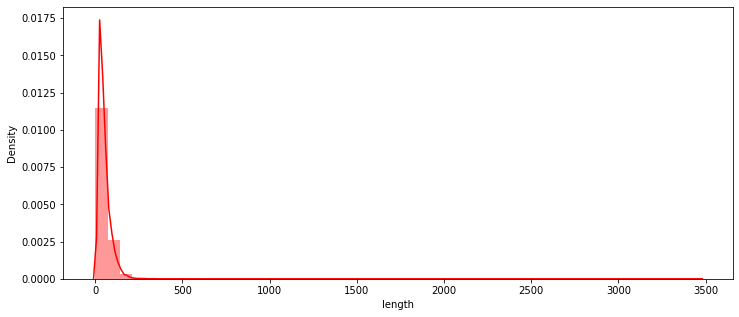

In [ ]:
# 뉴스 헤드라인 길이

train['length'] = train['content'].apply(lambda x: len(x))
plt.figure(figsize=(12,5))
sns.distplot(train['length'],color='r')

대부분 뉴스 헤드라인의 길이는 0~250자에 분포되어 있다

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


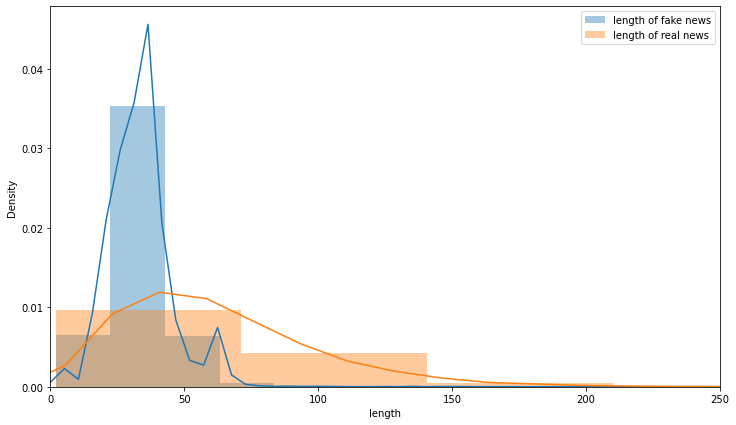

In [ ]:
plt.figure(figsize=(12,7))
fake = train.loc[train['info']==1]
real = train.loc[train['info']==0]
sns.distplot(fake['length'],label = 'length of fake news')
sns.distplot(real['length'],label = 'length of real news')
plt.xlim(0,250)
plt.legend()

진짜, 가짜 뉴스 텍스트의 길이 분포도를 보면 가짜 뉴스는 0-50자 사이에 치우쳐있는 반면, 진짜뉴스는 0-150에 골고루 분포되어있다

가짜 뉴스는 짧은 스팸성 내용이들어있다고 추측할 수 있다

In [ ]:
fake['length'].describe()

count    46932.000000
mean        34.470702
std         20.383651
min          2.000000
25%         27.000000
50%         34.000000
75%         39.000000
max       1022.000000
Name: length, dtype: float64

In [ ]:
real['length'].describe()

count    71813.000000
mean        62.342891
std         43.596060
min          2.000000
25%         34.000000
50%         55.000000
75%         82.000000
max       3469.000000
Name: length, dtype: float64

In [ ]:
# ord 의 가짜진짜 뉴스 분포 정도
# 가짜 뉴스에 대한 wordcloud 에 따라 해당 top 단어 들이 있는 컬럼을 fake뉴스로 예측.

AutoML 
https://dacon.io/competitions/official/235658/codeshare/1843?page=1&dtype=recent&ptype=pub
PB 0.94

자연어 처리 과정
1. Preprocessing
: 불용어 제거(Stopwords removing), 형태소 분석(Stemming), 표제어 추출(Lemmatization)


2. Vectorization
: One-hot Encoding, Count vectorization, Tfidf, Padding


3. Embedding
: Word2vec, Doc2vec, Glove, Fasttext


4. Modeling
: GRU, LSTM, Attention


위의 과정을 이번 신문기사 분류 문제에 적용해보면 다음과 같습니다.

1. 우선 데이터를 불러온 후 기사의 각 문장별로 Konlpy의 함수 중 하나를 활용하여 형태소 분석을 진행합니다.
2. 그 후 필요없는 단어들을 불용어로 지정하고 제외합니다.
3. 해당 결과를 sklearn 패키지의 함수 중 하나를 이용하여 정수 인코딩으로 변환해주는 Vectorization을 진행합니다.
4. 각 문장별로 벡터화된 문장들은 서로 다른 길이를 갖게 됩니다. 모델에 입력하기 위해 모든 문장 벡터들은 일정한 길이를 가져야 하므로 길이가 긴 문장을 자르고 길이가 짧은 문장은 0으로 채워넣습니다.(Padding)
5. 앞서 처리된 문장 벡터들을 특정 차원으로 임베딩 시킵니다. 딥러닝 모델을 이용할 시 자동으로 임베딩을 진행해주는 층을 추가하면 간단하게 진행이 됩니다. 성능을 높이기 위해서 pre-trained embedding인 word2vec, glove 등을 이용합니다.
6. 훈련을 시키고 테스트를 진행합니다.

### 1. Preprocessing -  형태소 분석, 불용어 제거

In [4]:
# konlpy Mecab 사용하기

!set -x \
&& pip install konlpy \
&& curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh | bash -x

+ pip install konlpy
     |████████████████████████████████| 19.4MB 1.3MB/s 
     |████████████████████████████████| 92kB 9.1MB/s 
     |████████████████████████████████| 460kB 44.6MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0
+ bash -x
+ curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh
+ mecab_dicdir=/usr/local/lib/mecab/dic/mecab-ko-dic
+ set -e
++ uname
+ os=Linux
+ [[ ! Linux == \L\i\n\u\x ]]
+ hash sudo
+ sudo=sudo
+ python=python3
+ hash pyenv
+ at_user_site=
++ check_python_site_location_is_writable
++ python3 -
+ [[ 1 == \0 ]]
+ hash automake
+ echo 'Installing automake (A dependency for mecab-ko)'
Installing automake (A dependency for mecab-ko)
+ install_automake
+ '[' Linux == Linux ']'
++ grep -Ei 'debian|buntu|mint' /etc/lsb-

In [5]:
from konlpy.tag import Mecab
import re

def text_preprocessing(text_list):
  stopwords = ['을', '를', '이', '가', '은','는','null'] #불용어 설정
  tokenizer = Mecab()
  token_list = []

  for text in text_list:
    txt = re.sub('[^가-힣a-z]', ' ', text.lower()) #한글, 소문자 남기고 나머지 모두 제거
    token = tokenizer.morphs(txt)
    token = [t for t in token if t not in stopwords or type(t) != float] #형태소 분석 결과 중 stopwords에 해당하지 않는 것만 추출
    token_list.append(token)

  return token_list, tokenizer

train['token'], mecab = text_preprocessing(train['content'])
train['token']

0                [이, 데일리, marketpoint, 현재, 코스닥, 기관, 억, 순매도]
1         [실적, 기반, 저가, 에, 매집, 해야, 할, 월, 급등, 유망주, top, 전격...
2               [하이스, 탁론, 선취, 수수료, 없, 는, 월, 최저, 금리, 상품, 출시]
3            [종합, 경제, 정보, 미디어, 이, 데, 일리, 무단, 전재, 재, 배포, 금지]
4                       [전국, 적, 인, 소비, 붐, 조성, 에, 기여, 할, 예정]
                                ...                        
118740    [미, fda, 임상, 상, 허가, 임박, 묻, 고, 따, 블, 로, 갈, 바이오,...
118741                    [똑똑, 해진, 소비자, 한국, 도, 이젠, 소형차, 시대]
118742                    [똑똑, 해진, 소비자, 한국, 도, 이젠, 소형차, 시대]
118743                      [년, 한국, tv, 대중, 대, 인터넷, 연결, 된다]
118744                      [년, 한국, tv, 대중, 대, 인터넷, 연결, 된다]
Name: token, Length: 118745, dtype: object

### 2. Vectorization 

: NLP를 컴퓨터가 이해할 수 있게 수치로 바꾸는 것
- Count vectorization, TfIdf, Padding


이번 대회에서는 특별한 vectorization 기법을 사용하지 않고 keras의 texts_to_sequences를 통한 정수화만 진행해 주어도 높은 정확도를 얻을 수 있다.

https://dacon.io/competitions/official/235658/codeshare/1839?page=1&dtype=recent&ptype=pub

In [6]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

def text2sequence(train_text, max_len=100):
    
    tokenizer = Tokenizer() #keras의 vectorizing 함수 호출
    tokenizer.fit_on_texts(train_text) #train 문장에 fit
    train_X_seq = tokenizer.texts_to_sequences(train_text) #각 토큰들에 정수 부여
    vocab_size = len(tokenizer.word_index) + 1 #모델에 알려줄 vocabulary의 크기 계산
    print('vocab_size : ', vocab_size)
    X_train = pad_sequences(train_X_seq, maxlen = max_len) #설정한 문장의 최대 길이만큼 padding
    
    return X_train, vocab_size, tokenizer


train_y = train['info']
train_X, vocab_size, vectorizer = text2sequence(train['token'], max_len = 100)
print(train_X.shape, train_y.shape)

vocab_size :  37238
(118745, 100) (118745,)


In [7]:
train_X

array([[  0,   0,   0, ..., 230,  51, 880],
       [  0,   0,   0, ...,  83, 570,  45],
       [  0,   0,   0, ...,  69, 287, 322],
       ...,
       [  0,   0,   0, ..., 162, 171, 134],
       [  0,   0,   0, ..., 137, 130,  60],
       [  0,   0,   0, ..., 137, 130,  60]], dtype=int32)

위에 정수화 말고 tfidf 사용해서 모델돌려보고 결과 비교해보기

## 3. Embedding
: Embedding을 통해 의미가 유사한 토큰들은 가깝게 임의의 차원에 뿌리자.
- 벡터화 방법들은 단어의 중요도나 문서 안에서의 중요도는 구분 할 수 있지만 단어 사이의 유사도는 구별할 수 없음.
- 비슷한 의미를 내포하고 있는 토큰들은 서로 가깝게, 그렇지 않은 토큰들은 서로 멀리 뿌리도록 하는 것이 임베딩의 목적


**`Embedding()에 넣어야하는 대표적인 인자`**

- 첫번째 인자 = 단어 집합의 크기. 즉, 총 단어의 개수
- 두번째 인자 = 임베딩 벡터의 출력 차원. 임베딩한 후 벡터의 크기
- input_length = 입력 시퀀스의 길이

#### word2vec
: 주변 단어와의 관계를 통해 해당 단어의 의미적 특성을 파악
- 단점: 사용자가 지정한 주변 단어의 개수에 대해서만 학습이 이루어지기 때문에 데이터 전체에 대한 정보를 담기 어렵다.
- 구글의 사전 훈련된 word2vec bin 파일을 다운로드 https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit

In [10]:
# gensim 모듈과 bin파일을 활용해 word2vec 모델을 로드
# 구글마운트

import gensim
word2vec = gensim.models.KeyedVectors.load_word2vec_format('/content/drive/MyDrive/Colab Notebooks/fake news detection/GoogleNews-vectors-negative300.bin.gz', binary = True)

word2vec에서 필요 단어만 추출

In [ ]:
# vectorizer.word_index.items() # = vocabulary 

In [11]:
# vocab_size = len(tokenizer.index_word) + 1
embedding_matrix = np.zeros((vocab_size, 300)) # 300차원의 임베딩 매트릭스 생성

# tokenizer에 있는 단어사전을 순회하면서 word2vec의 300차원 vector를 가져온다.
count = 0

for word, idx in vectorizer.word_index.items():
    if word in word2vec:                    # 넘겨 받은 토큰이 word2vec에 존재하면(이미 훈련된 토큰이라는 의미.)
      embedding_vector = word2vec[word]   # 해당 토큰에 해당하는 vector를 불러오고
      embedding_matrix[idx] = embedding_vector # 해당 위치의 embedding_matrix에 저장
   
    else:
     #  print(word, "word2vec에 없는 단어입니다.")
      count += 1
    pass
        
print('embedding_matrix.shape: ', embedding_matrix.shape)
print('없는 단어 count:', count)

embedding_matrix.shape:  (37238, 300)
없는 단어 count: 34405


### 4. modeling

keras embedding layer에 embedding_matrix를 가중치로 주어 이용

In [12]:
# tf.random.set_seed(42)

from sklearn.model_selection import train_test_split

# X_train, X_valid, y_train, y_valid = train_test_split(train_X, train_y, random_state = 42, test_size = 0.3)

NameError: ignored

##### validation o

model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

from tensorflow import keras
checkpoint_cb = keras.callbacks.ModelCheckpoint("juhee_best_model.h5",
                                               save_best_only = True)

history = model.fit(X_train, y_train,
                 epochs=10,
                 batch_size = 100, 
                 validation_data = (X_valid, y_valid), 
                 validation_batch_size = 100,
                 callbacks = [checkpoint_cb])



### 수정해보기

- dropout 을 0.5
- LSTM 출력 노드를 32로.

In [13]:
from keras.models import Sequential
from keras import regularizers
from keras.layers import Dense, Activation, Embedding, SpatialDropout1D, Dropout
from keras.layers import LSTM
import tensorflow as tf

max_len=1000
# vocab_size = 37238

tf.random.set_seed(42)

model = Sequential()
model.add(Embedding(vocab_size, 300,weights = [embedding_matrix], input_length = max_len)) #임베딩 가중치 적용 코드
model.add(SpatialDropout1D(0.5))
model.add(LSTM(64))  
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', kernel_regularizer = regularizers.l2(0.001)))
model.add(Dense(1, activation='sigmoid'))

model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1000, 300)         11171400  
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 1000, 300)         0         
_________________________________________________________________
lstm (LSTM)                  (None, 64)                93440     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 11,269,065
Trainable params: 11,269,065
Non-trainable params: 0
____________________________________________

In [14]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

from tensorflow import keras
checkpoint_cb = keras.callbacks.ModelCheckpoint("juhee_best_model.h5",
                                               save_best_only = True)

history = model.fit(train_X, train_y,
                 epochs=10,
                 batch_size = 100,
                 callbacks = [checkpoint_cb])


Epoch 1/10
1188/1188 [==============================] - 400s 337ms/step - loss: 0.0949 - accuracy: 0.9668
Epoch 2/10
1188/1188 [==============================] - 399s 336ms/step - loss: 0.0297 - accuracy: 0.9909
Epoch 3/10
1188/1188 [==============================] - 399s 336ms/step - loss: 0.0149 - accuracy: 0.9957
Epoch 4/10
1188/1188 [==============================] - 400s 337ms/step - loss: 0.0100 - accuracy: 0.9972
Epoch 5/10
1188/1188 [==============================] - 399s 335ms/step - loss: 0.0067 - accuracy: 0.9981
Epoch 6/10
1188/1188 [==============================] - 407s 342ms/step - loss: 0.0053 - accuracy: 0.9986
Epoch 7/10
1188/1188 [==============================] - 406s 342ms/step - loss: 0.0039 - accuracy: 0.9989
Epoch 8/10
1188/1188 [==============================] - 400s 337ms/step - loss: 0.0033 - accuracy: 0.9992
Epoch 9/10
1188/1188 [==============================] - 398s 335ms/step - loss: 0.0034 - accuracy: 0.9990
Epoch 10/10
1188/1188 [=======================

#### 모델 평가 VALIDATE

### test 데이터 가공

In [19]:
# test = pd.read_csv('data/news_test.csv')
test.head()

,n_id,date,title,content,ord,id
0,NEWS00237,20200118,"[주목!e스몰캡]코세스, 마이크로LED 시장 개화 최대수혜 기대",마이크로 LED TV 장비 양산 돌입- 전방업체 투자 확대로 본업도 호조연일 '신고가',1,NEWS00237_1
1,NEWS00237,20200118,"[주목!e스몰캡]코세스, 마이크로LED 시장 개화 최대수혜 기대",[이데일리 김대웅 기자] 반도체 장비 업체 코세스(089890)의 기술력이 마이크로...,2,NEWS00237_2
2,NEWS00237,20200118,"[주목!e스몰캡]코세스, 마이크로LED 시장 개화 최대수혜 기대",최근 대형 업체들과 거래를 맺고 관련 장비들의 양산에 돌입하면서 주가도 연일 신고가...,3,NEWS00237_3
3,NEWS00237,20200118,"[주목!e스몰캡]코세스, 마이크로LED 시장 개화 최대수혜 기대",TV를 필두로 올해부터 마이크로 LED의 시대가 본격적으로 개화할 것으로 예상되면서...,4,NEWS00237_4
4,NEWS00237,20200118,"[주목!e스몰캡]코세스, 마이크로LED 시장 개화 최대수혜 기대","코세스는 반도체 장비를 제조, 판매하는 업체로 지난 2006년 11월 코스닥 시장에...",5,NEWS00237_5


In [20]:
test.shape

(142565, 6)

In [21]:
# 1. preprocessing

test['token'], mecab = text_preprocessing(test['content'])
test['token']

0         [마이크, 로, led, tv, 장비, 양산, 돌입, 전방, 업체, 투자, 확대, ...
1         [이, 데일리, 김대웅, 기자, 반도체, 장비, 업체, 코, 세스, 의, 기술력, ...
2         [최근, 대형, 업체, 들, 과, 거래, 를, 맺, 고, 관련, 장비, 들, 의, ...
3         [tv, 를, 필두, 로, 올해, 부터, 마이크, 로, led, 의, 시대, 가, ...
4         [코, 세스, 는, 반도체, 장비, 를, 제조, 판매, 하, 는, 업체, 로, 지난...
                                ...                        
142560         [주식, 시장, 의, 역사, 를, 다시, 쓸, 역대, 급, 종목, 목표, 이상]
142561                    [똑똑, 해진, 소비자, 한국, 도, 이젠, 소형차, 시대]
142562                    [똑똑, 해진, 소비자, 한국, 도, 이젠, 소형차, 시대]
142563                      [년, 한국, tv, 대중, 대, 인터넷, 연결, 된다]
142564                      [년, 한국, tv, 대중, 대, 인터넷, 연결, 된다]
Name: token, Length: 142565, dtype: object

In [22]:
# 2. 벡터화
max_len=100

test_X_seq = vectorizer.texts_to_sequences(test['token']) #각 토큰들에 정수 부여
vocab_size = len(vectorizer.word_index) + 1 #모델에 알려줄 vocabulary의 크기 계산
print('vocab_size: ', vocab_size)
X_test = pad_sequences(test_X_seq, maxlen = max_len) #설정한 문장의 최대 길이만큼 padding
    
    
print(X_test.shape)


vocab_size:  37238
(142565, 100)


In [23]:

# model.load_weights("tutorial-3.h5")
model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')
result = model.predict(X_test)
result

array([[2.6065826e-01],
       [1.2226167e-04],
       [8.7600085e-05],
       ...,
       [9.9999583e-01],
       [9.9998236e-01],
       [9.9998236e-01]], dtype=float32)

In [24]:
result.shape

(142565, 1)

### submit

In [25]:
submission = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/fake news detection/sample_submission.csv")
submission.head()

,id,info
0,NEWS00237_1,0
1,NEWS00237_2,0
2,NEWS00237_3,0
3,NEWS00237_4,0
4,NEWS00237_5,0


In [26]:
submission.shape

(142565, 2)

In [27]:


submission.loc[:,'info'] = np.where(result> 0.5, 1,0).reshape(-1)

submission.loc[:,["id","info"]].to_csv("juhee-new_train dropout0.5.csv", index = False)
submission

,id,info
0,NEWS00237_1,0
1,NEWS00237_2,0
2,NEWS00237_3,0
3,NEWS00237_4,0
4,NEWS00237_5,0
...,...,...
142560,NEWS09482_72,1
142561,NEWS09482_73,1
142562,NEWS09482_74,1
142563,NEWS09482_75,1


##  베이스라인


- Train 데이터에서 라벨링된 광고 정보가 Test 데이터에 나오는 여부에 따라 1, 0 으로 예측
- Rule-Based 알고리즘을 활용

https://dacon.io/competitions/official/235658/codeshare/1844?page=1&dtype=recent&ptype=pub

In [ ]:
train_unique_ad_sentence = train.query('info == "1"')['content'].unique()
test_unique_sentence = test['content'].unique()

print(len(train_unique_ad_sentence))
print(len(test_unique_sentence))
print(len(set(train_unique_ad_sentence) & set(test_unique_sentence)))

# Test 데이터에 있는 65,827개의 고유 content 중 1,973개가 Train 데이터에서 나온 광고성 문구와 같다

In [ ]:
#  Train 데이터의 광고성 문구와 같으면 1, 아니면 0으로 예측하는 Rule-Based 알고리즘을 구축


from tqdm import tqdm

test_content = test['content'].values

for idx, sent in enumerate(tqdm(test_content)) : #Test 데이터에 있는 모든 content들에 대하여

    if sent in train_unique_ad_sentence: # Train 데이터의 광고성 문구와 같은지 비교
        submission['info'].iloc[idx] = 1 # 같으면 1

    else : 
        submission['info'].iloc[idx] = 0 # 다르면 0

print(submission.head())

In [ ]:
submission.to_csv('simple_baseline.csv', index = False)

In [ ]:
데이터 개수

count.mean()
